In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Lab 3 aims to practice usage of hugging face and fine tune transformers for classification task.
The dataset is the emotions from hugging face.

https://huggingface.co/datasets/dair-ai/emotion

This lab contains 3 tasks.

Question 1: Load in the emotions dataset and provide basic statistics of the dataset. Specifically your code should answer:

1) How many tweets (sentences) was used to train, test and validation?
2) Show 5 samples from the dataset
3) What are the target predict labels?
4) What are the distributions of labels in train, test, and validation (visualize the results using plots)
5) Analyze the words per tweet in the train, test, validation.

In [3]:
!pip install datasets


In [4]:
# put your code for Q1 here, you can have multiple code blocks.

from datasets import load_dataset
# Load the emotions dataset
ds = load_dataset("dair-ai/emotion")

# Display the dataset object to understand its structure
ds


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Train set size: 16000
Test set size: 2000
Validation set size: 2000
5 samples from the train set:
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}
{'text': 'i am feeling grouchy', 'label': 3}
Target labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


<ipython-input-5-403dda98b6ae>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


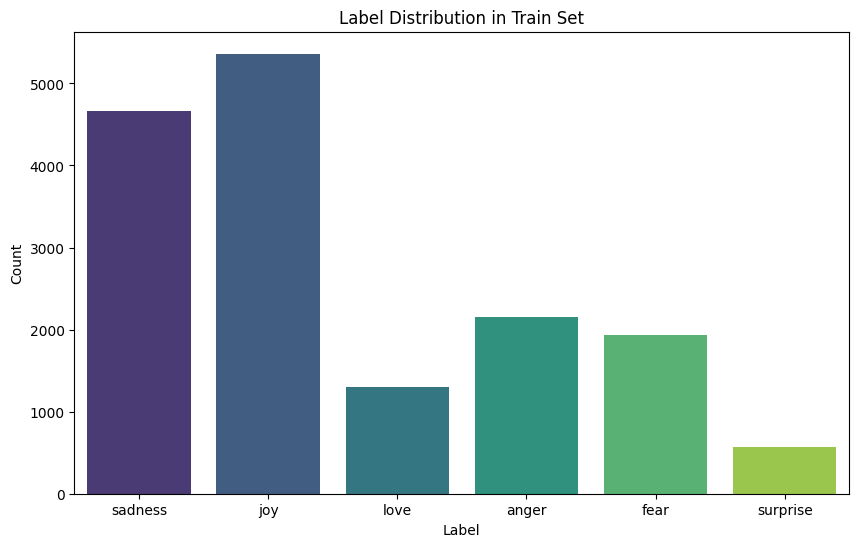

<ipython-input-5-403dda98b6ae>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


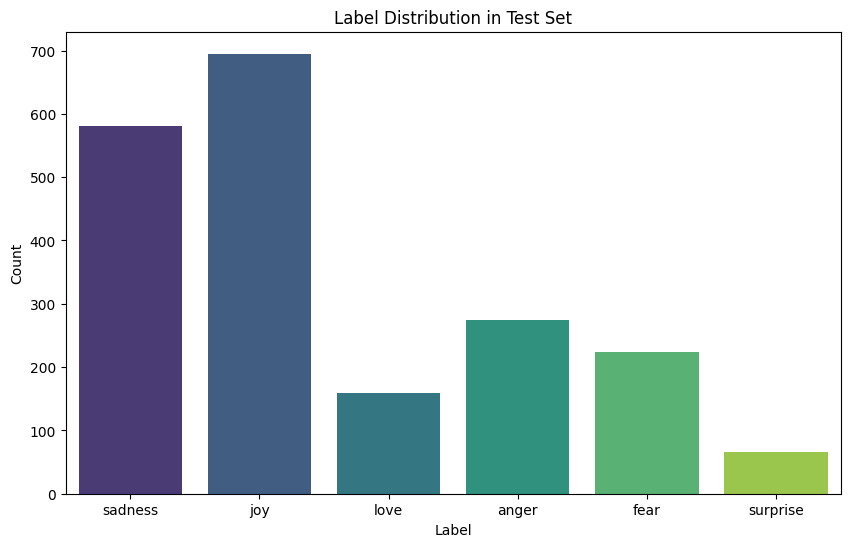

<ipython-input-5-403dda98b6ae>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


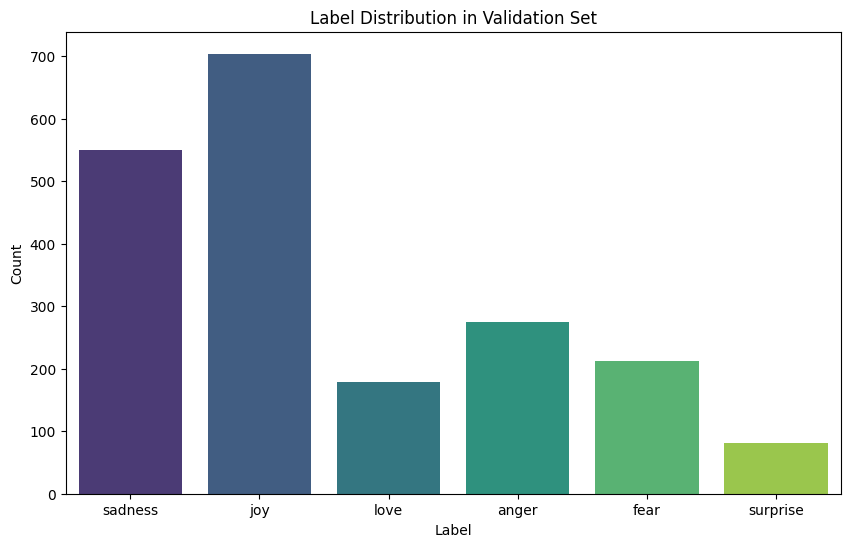

Average words per tweet in Train set: 19.17


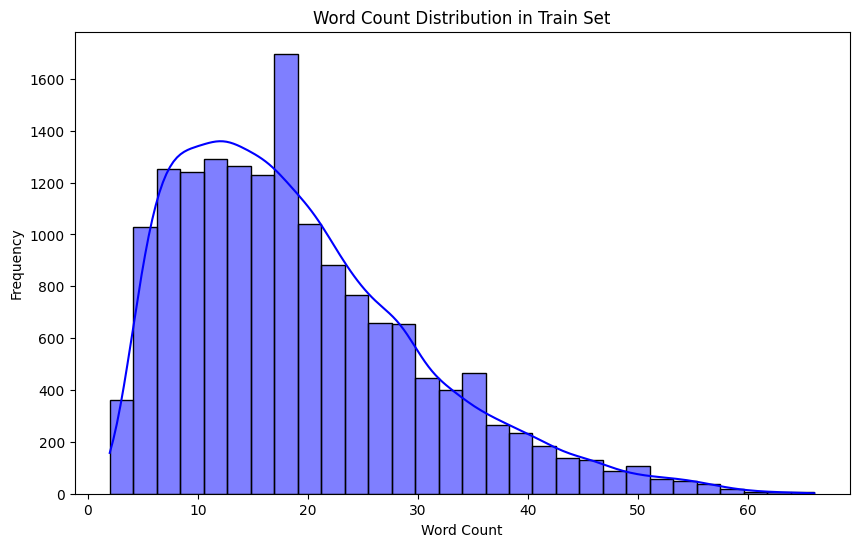

Average words per tweet in Test set: 19.15


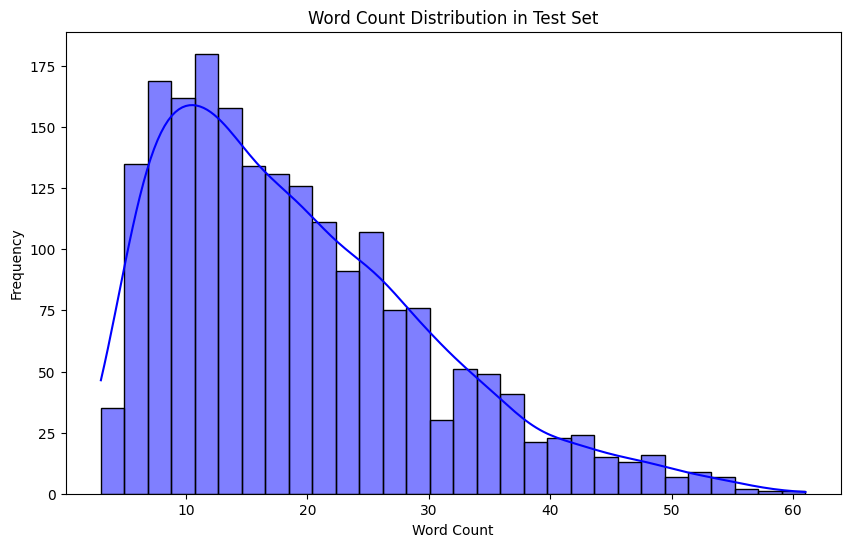

Average words per tweet in Validation set: 18.87


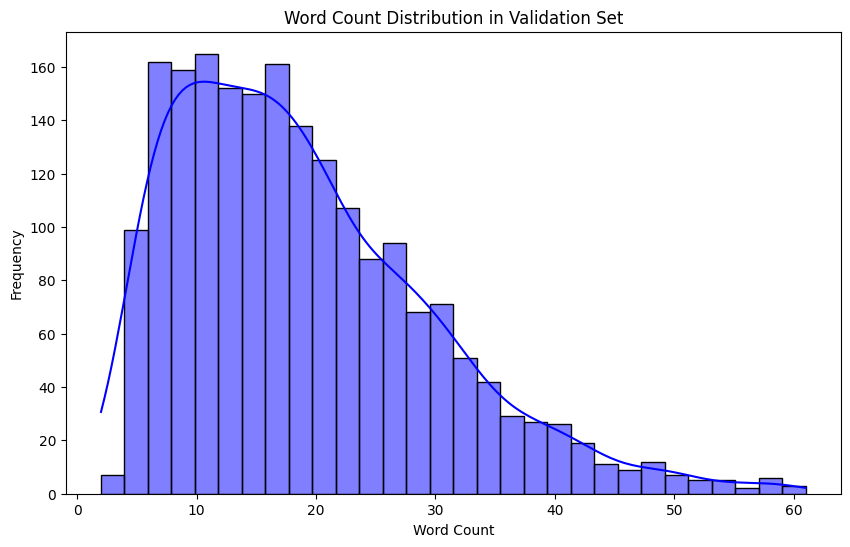

In [5]:

# 1) How many tweets (sentences) were used to train, test, and validate?
train_size = len(ds['train'])
test_size = len(ds['test'])
val_size = len(ds['validation'])

print(f"Train set size: {train_size}")
print(f"Test set size: {test_size}")
print(f"Validation set size: {val_size}")

# 2) Show 5 samples from the dataset
df=ds['train'].select(range(5))
# Print the selected samples
print("5 samples from the train set:")
for sample in df:
    print(sample)



# 3) What are the target prediction labels?
labels = ds['train'].features['label'].names
print(f"Target labels: {labels}")

train_df = pd.DataFrame(ds['train'])
test_df = pd.DataFrame(ds['test'])
val_df = pd.DataFrame(ds['validation'])

# 4) What are the distributions of labels in train, test, and validation?
def plot_label_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='label', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.show()

plot_label_distribution(train_df, 'Label Distribution in Train Set')
plot_label_distribution(test_df, 'Label Distribution in Test Set')
plot_label_distribution(val_df, 'Label Distribution in Validation Set')

# 5) Analyze the words per tweet in the train, test, validation.
def analyze_words_per_tweet(df, set_name):
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))
    avg_word_count = df['word_count'].mean()
    print(f"Average words per tweet in {set_name} set: {avg_word_count:.2f}")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
    plt.title(f'Word Count Distribution in {set_name} Set')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

analyze_words_per_tweet(train_df, 'Train')
analyze_words_per_tweet(test_df, 'Test')
analyze_words_per_tweet(val_df, 'Validation')

Summarize your answers to Q1 below, based on your analysis:

1) How many tweets (sentences) was used to train, test and validation?

Train set size: 16000

Test set size: 2000

Validation set size: 2000


2) Show 5 samples from the dataset
5 samples from the train set:
{'text': 'i didnt feel humiliated', 'label': 0}

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}

{'text': 'i am feeling grouchy', 'label': 3}


3) What are the target predict labels?
Target labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


4) What are the distributions of labels in train, test, and validation (visualize the results using plots)

shown above the distributions for train, test, validation using count, label histograms

5) Analyze the words per tweet in the train, test, validation.

Average words per tweet in Test set: 19.15

Average words per tweet in Validation set: 18.87

Average words per tweet in Train set: 19.17




Question 2: Tokenization. Use two different tokenization models provided by hugging face.

For instance:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

For each tokenizer:

Report the tokenizer's vocabulary size.

Present the tokenization results for the two selected tokenizers on three examples.



In [6]:
# put your code for Q2 here, you can have multiple code blocks.
from transformers import AutoTokenizer

# Define the tokenizers
tokenizer_1_name = 'distilbert-base-uncased'
tokenizer_2_name = 'gpt2'

# Load the tokenizers
tokenizer_1 = AutoTokenizer.from_pretrained(tokenizer_1_name)
tokenizer_2 = AutoTokenizer.from_pretrained(tokenizer_2_name)

# Report the vocabulary size for each tokenizer
vocab_size_1 = tokenizer_1.vocab_size
vocab_size_2 = tokenizer_2.vocab_size

print(f"Vocabulary size of {tokenizer_1_name}: {vocab_size_1}")
print(f"Vocabulary size of {tokenizer_2_name}: {vocab_size_2}")

# Define the examples
examples = [ds['train'][i]['text'] for i in range(3)]


# Tokenize the examples with both tokenizers
tokens_1 = [tokenizer_1.tokenize(example) for example in examples]
tokens_2 = [tokenizer_2.tokenize(example) for example in examples]

# Print the tokenization results
print("\nTokenization results for the first tokenizer (distilbert-base-uncased):")
for example, tokens in zip(examples, tokens_1):
    print(f"Example: {example}")
    print(f"Tokens: {tokens}\n")

print("\nTokenization results for the second tokenizer (gpt2):")
for example, tokens in zip(examples, tokens_2):
    print(f"Example: {example}")
    print(f"Tokens: {tokens}\n")


Vocabulary size of distilbert-base-uncased: 30522
Vocabulary size of gpt2: 50257

Tokenization results for the first tokenizer (distilbert-base-uncased):
Example: i didnt feel humiliated
Tokens: ['i', 'didn', '##t', 'feel', 'humiliated']

Example: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Tokens: ['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']

Example: im grabbing a minute to post i feel greedy wrong
Tokens: ['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']


Tokenization results for the second tokenizer (gpt2):
Example: i didnt feel humiliated
Tokens: ['i', 'Ġdidnt', 'Ġfeel', 'Ġhumiliated']

Example: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Tokens: ['i', 'Ġcan', 'Ġgo', 'Ġfrom', 'Ġfeeling', 'Ġso', 'Ġ

Summarize your answers to Q2 below, based on your analysis:


vocabulary Sizes:

distilbert-base-uncased: Vocabulary size is 30,522 tokens.


gpt2: Vocabulary size is 50,257 tokens.


Tokenization Results:


distilbert-base-uncased:


Example 1: "i didnt feel humiliated"
Tokens: ['i', 'didn', '##t', 'feel', 'humiliated']

Example 2: "i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake"
Tokens: ['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']

Example 3: "im grabbing a minute to post i feel greedy wrong"
Tokens: ['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']


gpt2:


Example 1: "i didnt feel humiliated"
Tokens: ['i', 'Ġdidnt', 'Ġfeel', 'Ġhumiliated']

Example 2: "i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake"
Tokens: ['i', 'Ġcan', 'Ġgo', 'Ġfrom', 'Ġfeeling', 'Ġso', 'Ġhopeless', 'Ġto', 'Ġso', 'Ġdamned', 'Ġhopeful', 'Ġjust', 'Ġfrom', 'Ġbeing', 'Ġaround', 'Ġsomeone', 'Ġwho', 'Ġcares', 'Ġand', 'Ġis', 'Ġawake']

Example 3: "im grabbing a minute to post i feel greedy wrong"
Tokens: ['im', 'Ġgrabbing', 'Ġa', 'Ġminute', 'Ġto', 'Ġpost', 'Ġi', 'Ġfeel', 'Ġgreedy', 'Ġwrong']


Question 3: Use one pretrained model offered by Huggingface, e.g., 'distilbert-base-uncased' to train a emotion classification model from train and report their performances on the validation dataset, in terms of accuracy, F1 score, precision and recall.

In [7]:
from datasets import load_dataset
from transformers import AutoTokenizer, DistilBertModel
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import torch
import numpy as np


# Load the DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize all texts and ensure consistent length
def tokenize_and_pad(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=60)

# Apply tokenization to the dataset
tokenized_datasets = ds.map(tokenize_and_pad, batched=True)

# Convert to features (input_ids) and labels
X_train = np.array(tokenized_datasets['train']['input_ids'])
X_val = np.array(tokenized_datasets['validation']['input_ids'])
y_train = np.array(tokenized_datasets['train']['label'])
y_val = np.array(tokenized_datasets['validation']['label'])

# Load the pretrained DistilBERT model
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Switch to evaluation mode
model.eval()

# Define a function to get embeddings
def get_embeddings(input_ids):
    with torch.no_grad():
        outputs = model(input_ids)
        # Only take the output from the last layer
        embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token embedding
    return embeddings.numpy()

# Get embeddings for train and validation sets in batches to avoid memory issues
def get_batched_embeddings(input_ids, batch_size=16):
    embeddings_list = []
    for i in range(0, len(input_ids), batch_size):
        batch_input_ids = torch.tensor(input_ids[i:i+batch_size])
        batch_embeddings = get_embeddings(batch_input_ids)
        embeddings_list.append(batch_embeddings)
    return np.vstack(embeddings_list)

train_embeddings = get_batched_embeddings(X_train)
val_embeddings = get_batched_embeddings(X_val)

# Define a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)

# Fit the classifier on the train embeddings and labels
classifier.fit(train_embeddings, y_train)

# Predict on the validation embeddings
y_pred = classifier.predict(val_embeddings)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Accuracy: 0.64
Precision: 0.629085820534521
Recall: 0.64
F1 Score: 0.623063777775933


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Summarize your answers to Q3 below, based on your analysis:

Accuracy: 0.64

Precision: 0.629085820534521

Recall: 0.64

F1 Score: 0.623063777775933

with logisitic regression